#Testing Experiments
> The portion from Data preprocessing till final checking is on the Data online Available

> Final Trial on real Data  portions contain Expermient on Real Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
from  sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import librosa 
import librosa.display as dis
import os
import matplotlib.pyplot as plt
import glob
import numpy as np
from tensorflow.keras import * 

#Data preprocessing

#Experiments on Online Data

In [0]:
#loading data

import glob
import os
import pandas as pd


df = []
for folder in ["/content/drive/My Drive/Colab Notebooks/continuous_wavelet_transform/continuous_wavelet_transform/train/sick/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["jpg"]:
      
        df.append(
              {
                  "filename " : fname,
               "label" : "sick" ,
               
              })
      


In [0]:

import glob
import os
import pandas as pd



for folder in ["/content/drive/My Drive/Colab Notebooks/continuous_wavelet_transform/continuous_wavelet_transform/train/not_sick/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["jpg"]:
        df.append(
              {
                  "filename " : fname,
               "label" : "not_sick" 
              })
      

In [0]:
df

[]

In [0]:

data=pd.DataFrame(df)

print(data.count())
data.head()

filename     4945
label        4945
dtype: int64


,filename,label
0,/content/drive/My Drive/Colab Notebooks/contin...,sick
1,/content/drive/My Drive/Colab Notebooks/contin...,sick
2,/content/drive/My Drive/Colab Notebooks/contin...,sick
3,/content/drive/My Drive/Colab Notebooks/contin...,sick
4,/content/drive/My Drive/Colab Notebooks/contin...,sick


In [0]:
plt.figure(figsize = (12,6))
data['label'].value_counts().plot(kind = 'bar' , title = ' Distribution' )
plt.show()
print(data['label'].value_counts())

In [0]:
from sklearn.utils import shuffle
data =shuffle(data, random_state =48)
data.head()

,filename,label
1387,/content/drive/My Drive/Colab Notebooks/contin...,sick
2728,/content/drive/My Drive/Colab Notebooks/contin...,not_sick
759,/content/drive/My Drive/Colab Notebooks/contin...,sick
1049,/content/drive/My Drive/Colab Notebooks/contin...,sick
4288,/content/drive/My Drive/Colab Notebooks/contin...,not_sick


In [0]:
def duration_file(path):
  y,sr = librosa.load(path)
  dur = librosa.core.get_duration(y)
  return dur


from tqdm import tqdm
duration= [ ]

train = data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(train))):
  duration.append(duration_file(train.filename.iloc[i]))
  


In [0]:
import glob
import os
import pandas as pd


#val = []
for folder in ["/content/drive/My Drive/Colab Notebooks/continuous_wavelet_transform/continuous_wavelet_transform/validation/sick/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["jpg"]:
        df.append(
              {
                  "filename " : fname,
               "label" : "sick" 
              })

In [0]:

import glob
import os
import pandas as pd



for folder in ["/content/drive/My Drive/Colab Notebooks/continuous_wavelet_transform/continuous_wavelet_transform/validation/not_sick/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["jpg"]:
        df.append(
              {
                  "filename " : fname,
               "label" : "not_sick" 
              })

In [0]:
validation_data=pd.DataFrame(val)

print(validation_data.count())
validation_data.head()

filename     1219
label        1219
dtype: int64


,filename,label
0,/content/drive/My Drive/Colab Notebooks/Audio ...,sick
1,/content/drive/My Drive/Colab Notebooks/Audio ...,sick
2,/content/drive/My Drive/Colab Notebooks/Audio ...,sick
3,/content/drive/My Drive/Colab Notebooks/Audio ...,sick
4,/content/drive/My Drive/Colab Notebooks/Audio ...,sick


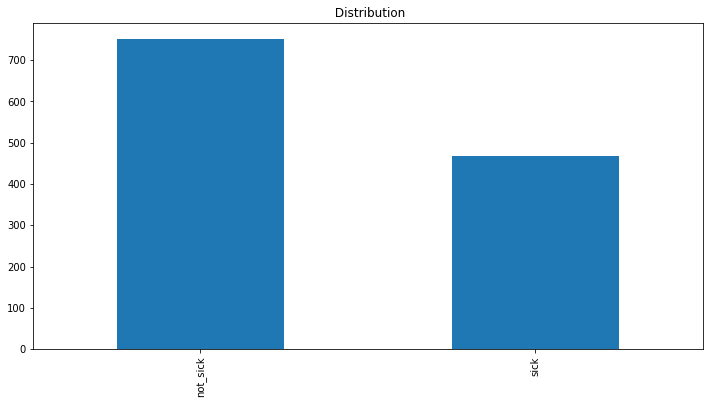

not_sick    752
sick        467
Name: label, dtype: int64


In [0]:
plt.figure(figsize = (12,6))
validation_data['label'].value_counts().plot(kind = 'bar' , title = ' Distribution' )
plt.show()
print(validation_data['label'].value_counts())

In [0]:
from sklearn.utils import shuffle
validation_data =shuffle(data, random_state =40)
validation_data.head()

,filename,label
2069,/content/drive/My Drive/Colab Notebooks/Audio ...,not_sick
2892,/content/drive/My Drive/Colab Notebooks/Audio ...,not_sick
126,/content/drive/My Drive/Colab Notebooks/Audio ...,sick
1768,/content/drive/My Drive/Colab Notebooks/Audio ...,not_sick
1132,/content/drive/My Drive/Colab Notebooks/Audio ...,sick


#features extracting

**Filter Design**
* Low Pass
* High Pass
*Freq domain
* Butterworth filter

   **Ongoing**

* Chebyshev filters
*Kalman filters
*Autoregressive filters

In [0]:
from numpy.fft import *
from scipy import fftpack

def low_pass(path, threshold=1e6):
    s,sr = librosa.load(path)
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2/s.size)
    fourier[frequencies > threshold] = 0
    return irfft(fourier)

def high_pass(s, threshold=1e7):
    fourier = rfft(s)
    frequencies = rfftfreq(s.size, d=2e-2/s.size)
    fourier[frequencies < threshold] = 0
    return irfft(fourier)  

def freqdomain(s):
  X = fftpack.fft(s,n=400)
  freqs = fftpack.fftfreq(n=400,d=2e-2/s.size)
  return freqs  

import scipy.signal

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq= 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = scipy.signal.butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = scipy.signal.lfilter(b, a, data)
    return y


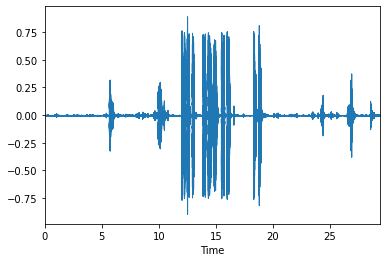

In [0]:
import librosa
import librosa.display
path = '/content/neg-3.wav'
x,sr = librosa.load('/content/neg-3.wav')
librosa.display.waveplot(x,sr)

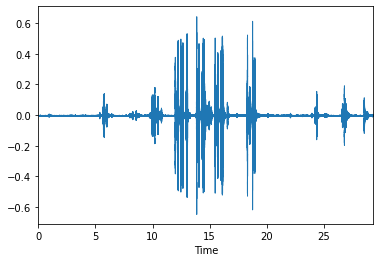

In [0]:
y1 = low_pass(path)
librosa.display.waveplot(y1,sr)

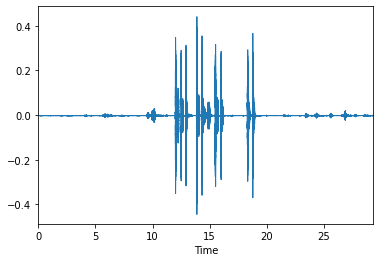

In [0]:
y2 = butter_bandpass_filter(x,5000,10000,fs = sr,order=4)
librosa.display.waveplot(y2,sr)  

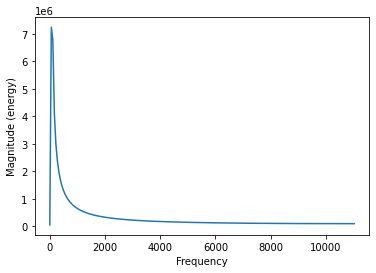

In [0]:
freq = freqdomain(x)
import matplotlib.pyplot as plt
plt.magnitude_spectrum(freq,sr)
plt.show()

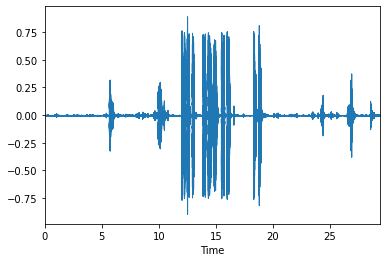

In [0]:
import librosa
import librosa.display
path = '/content/neg-3.wav'
signal,sr =librosa.load(path)
librosa.display.waveplot(signal)
trimmed, index = librosa.effects.trim(y2, top_db=20, frame_length=512, hop_length=64)


**The Filtered and Trimmed Wave**

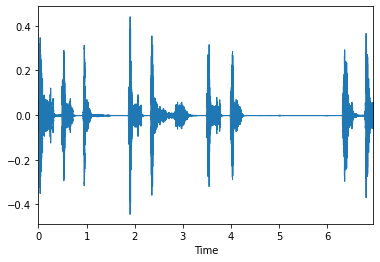

In [0]:
librosa.display.waveplot(trimmed)

In [0]:
#@title Filter features
low_p=[]
high_p=[]
freqdom=[]
freq_low=[]
freq_high =[]
def filter_features(path):
  f,samp_rate = librosa.load(path=path,duration=4 )
  
  low_pass1=np.array(low_pass(f))
  low_p.append(low_pass1)
  
  high_pass1=np.array(high_pass(f))
  high_p.append(high_pass1)
  
  freq=np.array(freqdomain(f))
  freqdom.append(freq)

  freq_low=np.array(freqdomain(low_pass))
  freq_low.append(freq_low)
  
  freq_high=np.array(freqdomain(high_pass))
  freq_high.append(freq_high)

  return low_p,high_p,freqdom,freq_high,freq_low
  




**RESEARCHING** 
>Neural Network Approach by inputing the noising into 
CNN network signal and then calculating the MSE loss 

#Features Engineering

I  have Extract different Features down below
* rms_energy 
* zcr 
* spectral_energy 
* centroid
* mfcc
* rolloff
*pitch
*melspectrogram
*Constant-Q chromagram
*DWT 

In [0]:
from tqdm import tqdm
rms = []
zcr = []
spectral_energy = []
centroid=[]
mfcc=[]
rolloff=[]
pitch=[]
mel=[]
chroma1 = []

dr =10 

def features1(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_centroid(x,sr)
  return values

def features2(path):
  x,sr = librosa.load(path,duration=dr)
  values = librosa.core.zero_crossings(x)
  return values

def features3(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_rolloff(y=x,sr=sr)
  return values

def features4(path):
  x,sr = librosa.load(path,duration=dr)
  values, magnitudes = librosa.piptrack(y=x, sr=sr)
  return values

def features5(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.mfcc(x,sr,n_mfcc=25)
  return values


def features6(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.rms(y=x)

def features7(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.melspectrogram(y=x,sr=sr)
  return values


def features8(path):
  x,sr = librosa.load(path)
  values =librosa.get_duration(y=x,sr=sr)
  return values
def melfeatures(path):
  f,samp_rate = librosa.load(path=path,duration = dr)
  mel = librosa.feature.melspectrogram(y=f ,sr = samp_rate)
  return mel
def chroma(path):
  f,samp_rate = librosa.load(path=path,duration = 10)
  mfccs = librosa.feature.chroma_cqt(y=f,sr=samp_rate)
  return mfccs 



In [0]:
import librosa
train = data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(train))):
  rms.append(features6(train.filename.iloc[i]))
  zcr.append(features2(train.filename.iloc[i])) 
  mfcc.append(features5(train.filename.iloc[i])) 
  centroid.append(features1(train.filename.iloc[i])) 
  spectral_energy.append(features5(train.filename.iloc[i]))
  rolloff.append(features3(train.filename.iloc[i])) 
  pitch.append(features4(train.filename.iloc[i]))
  mel.append(melfeatures(train.filename.iloc[i]))
  chroma1.append(chroma(train.filename.iloc[i]))
  

In [0]:
'''
def melfeatures(path):
  f,samp_rate = librosa.load(path=path,duration = 4)
  mel = librosa.feature.melspectrogram(y=f ,sr = samp_rate)
  return mel
def pitch_features(path):
  y, sr = librosa.load(path ,duration = 4)
  pitches, magnitudes = librosa.core.piptrack(y, sr)
  return pitches

def mfcc_features(path):

  f,samp_rate = librosa.load(path=path,duration=4 )
  mfccs = librosa.feature.mfcc(y=f,sr=samp_rate,n_mfcc=12)
  return mfccs


 


def features(path):

  f,samp_rate = librosa.load(path=path,duration = 4)
  mfccs = librosa.feature.chroma_cqt(y=f,sr=samp_rate)
  return mfccs   
'''

In [0]:
meltrain = np.array(meltrain)
meltrain.shape

(3716, 128, 173)

In [0]:
concat1 = np.concatenate((mfcc,meltrain),axis =1)
concat1.shape

(3716, 168, 173)

In [0]:
def dwt_features(path):
  f,samp_rate = librosa.load(path=path)
  A,D=  pywt.dwt()
  return D  
  
import cv2
data_cwt=[]
labels=[]
from tqdm import tqdm

for f in tqdm(df):
  file = list(f.values())
  file_path = file[0]
  label = file[1]
  image = cv2.imread(file_path)
  #image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  #image = cv2.resize(image, (227, 227))
  
  data_cwt.append(image)
  labels.append(label)

data_cwt = np.array(data_cwt)
labels = np.array(labels)

import numpy as np 
data_cwt = np.array(data_cwt)
labels = np.array(labels)
data_cwt.shape

In [0]:
import numpy as np

import librosa.core
y, sr = librosa.load('/content/drive/My Drive/Colab Notebooks/Audio Data/train/sick/audioset_-J60og_pQtQ_0_5.wav',duration =5)
pitches, magnitudes = librosa.core.piptrack(y, sr)

pitches1 = pitches[magnitudes > np.median(magnitudes)]
pitches2 = librosa.pitch_tuning(pitches1)


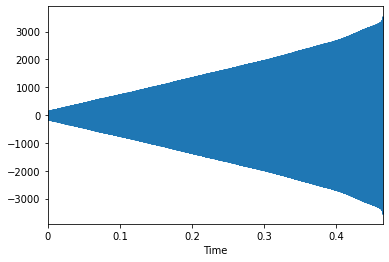

In [0]:
import librosa.display
librosa.display.waveplot(pitches1,sr)

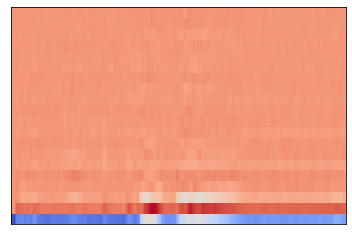

In [0]:
import librosa.display
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
librosa.display.specshow(mfcc)

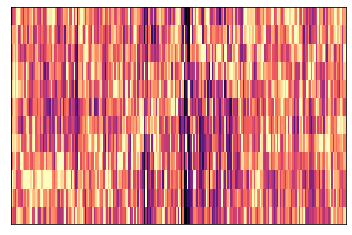

In [0]:
import librosa.display
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
librosa.display.specshow(chroma)

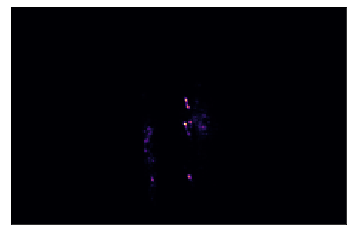

In [0]:
import librosa.display
chroma = librosa.feature.melspectrogram(y=y, sr=sr)
librosa.display.specshow(chroma)

In [0]:
from tqdm import tqdm
pitchfeatures = []
train = data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(train))):
  pitchfeatures.append(pitch_features(train.filename.iloc[i]))  

100%|██████████| 3716/3716 [33:06<00:00,  1.87it/s]


In [0]:
pitchfeatures=np.array(pitchfeatures)
pitchfeatures.shape

(3716, 1025, 173)

#Data split

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lb = LabelBinarizer()
labels = lb.fit_transform(data.label)
labelss = to_categorical(labels)



Using TensorFlow backend.


In [0]:
from sklearn.model_selection import train_test_split
(x_train, xtest, ytrain, ytest) = train_test_split(pitchfeatures, labels,
	test_size=0.40, stratify=labels, random_state=40)


In [0]:
x_train =Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],Xtrain.shape[2],1)
xtest =xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)
print(ytrain.shape)
x_train.shape

#Deep Learning Models

In [0]:
from keras.layers import *
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'),input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]) ))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_2 (TimeDist (None, 2, 10, 64)         33280     
_________________________________________________________________
time_distributed_3 (TimeDist (None, 2, 8, 64)          12352     
_________________________________________________________________
time_distributed_4 (TimeDist (None, 2, 8, 64)          0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, 2, 4, 64)          0         
_________________________________________________________________
time_distributed_6 (TimeDist (None, 2, 256)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 2, 100)            142800    
_________________________________________________________________
lstm_10 (LSTM)               (None, 2, 100)          

In [0]:
from keras.layers import Layer
import keras.backend as K
class attention(Layer):
    def __init__(self,**kwargs):
        super(attention,self).__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name="attention_weight",shape=(input_shape[-1],1),initializer="normal")
        self.b=self.add_weight(name="attention_bias",shape=(input_shape[1],1),initializer="zeros")        
        super(attention, self).build(input_shape)

    def call(self,x):
        out=K.squeeze(K.tanh(K.dot(x,self.W)+self.b),axis=-1)
        at=K.softmax(out)
        at=K.expand_dims(at,axis=-1)
        output=x*at
        return K.sum(output,axis=1)

    def compute_output_shape(self,input_shape):
        return (input_shape[0],input_shape[-1])

    def get_config(self):
        return super(attention,self).get_config()

In [0]:
from keras import *
from keras.layers import *
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'),input_shape=(227,227,3) ))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True,name = 'lstm2'))
layer_name = 'lstm2'

out1 =model.get_layer(layer_name).output
attention = attention()(out1)
out1 = (Dense(100, activation='relu'))(attention)
out2 = (Dense(2, activation='softmax'))(out1)
final_model=Model(inputs = model.input,outputs = out2)
final_model.summary()





Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_21_input (I (None, 227, 227, 3)       0         
_________________________________________________________________
time_distributed_21 (TimeDis (None, 227, 225, 64)      640       
_________________________________________________________________
time_distributed_22 (TimeDis (None, 227, 223, 64)      12352     
_________________________________________________________________
time_distributed_23 (TimeDis (None, 227, 223, 64)      0         
_________________________________________________________________
time_distributed_24 (TimeDis (None, 227, 111, 64)      0         
_________________________________________________________________
time_distributed_25 (TimeDis (None, 227, 7104)         0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 227, 100)          2882

In [0]:
from keras import *
from keras.layers import *
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu',input_shape=(1308, 431 )) )
model.add((Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add((Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add((Dropout(0.5)))
model.add((MaxPooling1D(pool_size=2)))
#model.add((Flatten()))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True,name = 'lstm2'))
model.add(LSTM(100,return_sequences=True,name = 'ls3'))
layer_name = 'lstm2'

out1 =model.get_layer(layer_name).output

#attention = attention()(out1)
out1 = Flatten()(out1)
out1 = (Dense(100, activation='relu'))(out1)
out1 = (Dense(100, activation='relu'))(out1)
out1 = (Dense(100, activation='relu'))(out1)
out2 = (Dense(2, activation='softmax'))(out1)
finalmodel_1=Model(inputs = model.input,outputs = out2)
finalmodel_1.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7_input (InputLayer)  (None, 1308, 431)         0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1306, 64)          82816     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1304, 64)          12352     
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1302, 64)          12352     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1302, 64)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 651, 64)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 651, 100)          6600

In [0]:
from keras import *
from keras.layers import *
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3,kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(Xtrain.shape[1],Xtrain.shape[2] )) )
model.add((Conv1D(filters=64, kernel_size=3, kernel_regularizer=regularizers.l2(0.001),activation='relu')))
model.add(BatchNormalization(momentum=0.99))
model.add((Dropout(0.5)))
model.add((MaxPooling1D(pool_size=2)))
#model.add((Flatten()))
model.add(LSTM(100,return_sequences=True))
model.add(LSTM(100,return_sequences=True,name = 'lstm2'))
layer_name = 'lstm2'

out1 =model.get_layer(layer_name).output

attention = attention()(out1)
out1 = (Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.001)))(attention)
out2 = (Dense(2, activation='softmax'))(out1)
final_model2=Model(inputs = model.input,outputs = out2)
final_model2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3_input (InputLayer)  (None, 68, 159)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 66, 64)            30592     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 64, 64)            12352     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64)            256       
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 64)            0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32, 100)           6600

In [0]:
from keras.layers import *
from keras import *
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())


model.add(Dense(2, activation='softmax'))
model.summary()

#Train

In [0]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(x_train, ytrain,
              batch_size=100,
            epochs=10,
              validation_data=(xtest,ytest),
              shuffle=True,
              verbose=1
            )

In [0]:
import keras
adam=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False, clipnorm=1.0)
final_model2.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=adam)

history = final_model2.fit(x_train, ytrain,
              batch_size=10,
            epochs=40,
              validation_data=(xtest,ytest),
              shuffle=True,
              verbose=1
            )

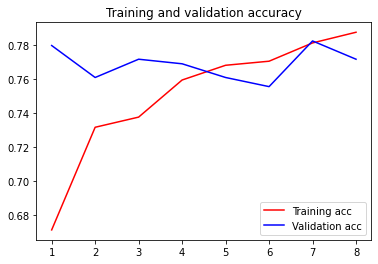

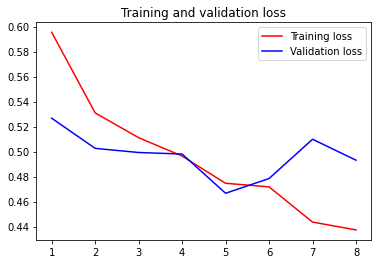

In [0]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', color='red',label='Training acc')
plt.plot(epochs, val_acc, 'b',color='blue', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, '',color='red', label='Training loss')
plt.plot(epochs, val_loss, 'b',color='blue', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Test Data

In [0]:
from tqdm import tqdm
mfcctest = []

validation_data = validation_data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(validation_data))):
  mfcctest.append(features(validation_data.filename.iloc[i]))


In [0]:
from tqdm import tqdm
meltest = []
validation_data =validation_data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(validation_data))):
  meltest.append(newfeatures(validation_data.filename.iloc[i]))

In [0]:
meltest = np.array(meltest)
print(meltest.shape)

mfcctest = np.load('/content/drive/My Drive/Colab Notebooks/Audio Data/mfcctest.npy')
print(mfcctest.shape)
concat1_test = np.concatenate((mfcctest,meltest),axis =1)
print(concat1_test.shape)

(1219, 128, 173)
(1219, 40, 173)
(1219, 168, 173)


In [0]:
labels.shape

(1219, 1)

In [0]:
#Increasing Training data
new_train=(np.concatenate((concat1,concat1_test),axis =0))
print(new_train.shape)
new_label=(np.concatenate((labels,label_test),axis =0))
print(new_label.shape)
(x_train, xtest, ytrain, ytest) = train_test_split(new_train, new_label,
	test_size=0.20, random_state=32)


(4935, 168, 173)
(4935, 2)


In [0]:
lb = LabelBinarizer()
labels1 = lb.fit_transform(validation_data.label)
label_test = to_categorical(labels1)
test_data = concat1_test
test_data = test_data.reshape(1219,168,173)
print(label_test.shape )
test_data.shape

(1219, 2)


(1219, 168, 173)

In [0]:
scores = final_model2.evaluate(test_data, label_test, verbose=1)

print('Test accuracy:', scores[1]*100)

1219/1219 [==============================] - 2s 2ms/step
Test accuracy: 71.6160774230957


In [0]:
pred = model.predict(test_data, batch_size=100)
pred = np.argmax(pred, axis=1)
from sklearn.metrics import accuracy_score
acc = accuracy_score(label_test,pred)


In [0]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(label_test,pred)

In [0]:
print(classification_report(label_test.argmax(axis=1), pred,
	target_names=lb.classes_))
cm = confusion_matrix(label_test.argmax(axis=1), pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
print(cm)
print("acc:" ,acc*100)
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

**Scaling**

In [0]:
combined_features[np.isnan(combined_features)]


In [0]:
x_train.max()
combined_features = np.reshape(features,(3716,-1))
combined_features.shape

(3716, 26296)

In [0]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(combined_features)
combined_features = imp_mean.transform(combined_features)
scalar.fit(combined_features)
combined_features = scalar.transform(combined_features)
combined_features.max()

1.0

In [0]:
scalar.fit(combined_features)
combined_features = scalar.transform(combined_features)
combined_features.shape

(3716, 26296)

#Final Checking

In [0]:
import librosa
path= '/content/positiveimprove3.wav'
testing1 = features(path)
testing2= melfeatures(path)
testing3=mfcc_features(path)
print(testing1.shape)
print(testing2.shape)
print(testing3.shape)

(12, 173)
(128, 173)
(12, 173)


In [0]:
finaltesting = np.concatenate((testing1,testing2,testing3),axis=0)
print(finaltesting.shape)
finaltesting = finaltesting.reshape(1,finaltesting.shape[0],finaltesting.shape[1])

finaltesting.shape
finaltesting = np.reshape(finaltesting,(1,-1))

(152, 173)


In [0]:
Rd.predict(finaltesting)

array([[0., 1.]], dtype=float32)

#Experiments On Real Data

> working on 32 samples 

> working on 64 samples




#First Trial on Real Data

> This is first trial of training on real data in this 

> I have 32 samples 16 positive and 16 negative samples

**Data Extracting**

In [0]:

import glob
import os
import pandas as pd


df = []
for folder in ['/content/drive/My Drive/Colab Notebooks/Audio Data/COVID-19 Converted/COVID-19 Converted/Postive-con/**',
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["wav"]:
      
        df.append(
              {
                  "filename " : fname,
               "label" : "positve" ,
               
              })
      

In [0]:

import glob
import os
import pandas as pd


for folder in ["/content/drive/My Drive/Colab Notebooks/Audio Data/Real/coughs/Neg/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      
      if label  in ["wav"]:
      
        df.append(
              {
                  "filename " : fname,
               "label" : "negative" ,
               
              })
      

In [0]:
import pandas as pd
data = pd.DataFrame(df)
data.head()

,filename,label
0,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
1,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
2,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
3,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
4,/content/drive/My Drive/Colab Notebooks/Audio ...,positve


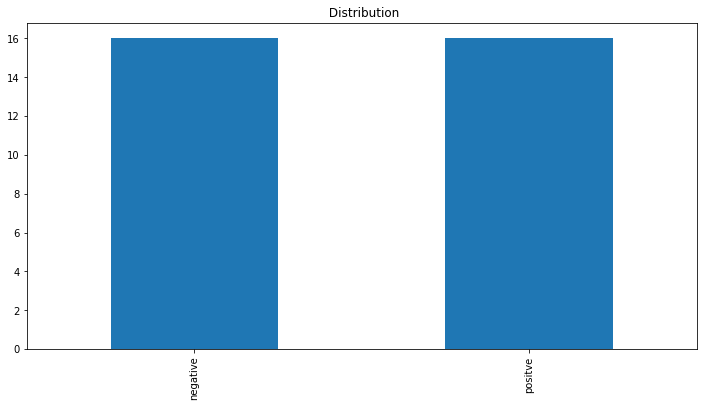

negative    16
positve     16
Name: label, dtype: int64


In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
data['label'].value_counts().plot(kind = 'bar' , title = ' Distribution' )
plt.show()
print(data['label'].value_counts())

In [0]:
from sklearn.utils import shuffle
data =shuffle(data, random_state =48)
data.head()

,filename,label
29,/content/drive/My Drive/Colab Notebooks/Audio ...,negative
25,/content/drive/My Drive/Colab Notebooks/Audio ...,negative
9,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
1,/content/drive/My Drive/Colab Notebooks/Audio ...,positve
18,/content/drive/My Drive/Colab Notebooks/Audio ...,negative


**Features Extraction**


I  have Extract different Features down below
* rms
* zcr 
* spectral_energy 
* centroid
* mfcc
* rolloff
*pitch
*melspectrogram
*chroma


In [0]:
from tqdm import tqdm
rms_energy = []
zcr = []
spectral_energy = []
centroid=[]
mfcc=[]
rolloff=[]
pitch=[]
mel=[]
chroma1 = []

dr =10 

def features1(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_centroid(x,sr)
  return values

def features2(path):
  x,sr = librosa.load(path,duration=dr)
  values = librosa.core.zero_crossings(x)
  return values

def features3(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_rolloff(y=x,sr=sr)
  return values

def features4(path):
  x,sr = librosa.load(path,duration=dr)
  values, magnitudes = librosa.piptrack(y=x, sr=sr)
  return values

def features5(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.mfcc(x,sr,n_mfcc=25)
  return values


def features6(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.rms(y=x)

def features7(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.melspectrogram(y=x,sr=sr)
  return values


def features8(path):
  x,sr = librosa.load(path)
  values =librosa.get_duration(y=x,sr=sr)
  return values
def melfeatures(path):
  f,samp_rate = librosa.load(path=path,duration = dr)
  mel = librosa.feature.melspectrogram(y=f ,sr = samp_rate)
  return mel
def chroma(path):
  f,samp_rate = librosa.load(path=path,duration = 10)
  mfccs = librosa.feature.chroma_cqt(y=f,sr=samp_rate)
  return mfccs 




In [0]:
import librosa
train = data.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(train))):
  rms_energy.append(features6(train.filename.iloc[i]))
  zcr.append(features2(train.filename.iloc[i])) 
  mfcc.append(features5(train.filename.iloc[i])) 
  centroid.append(features1(train.filename.iloc[i])) 
  spectral_energy.append(features5(train.filename.iloc[i]))
  rolloff.append(features3(train.filename.iloc[i])) 
  pitch.append(features4(train.filename.iloc[i]))
  mel.append(melfeatures(train.filename.iloc[i]))
  chroma1.append(chroma(train.filename.iloc[i]))
  


100%|██████████| 32/32 [03:12<00:00,  6.01s/it]


In [0]:
import numpy as np

rms_energy = np.array(rms_energy)
zcr = np.array(zcr)
spectral_energy= np.array(spectral_energy)
centroid = np.array(centroid)
mfcc= np.array(mfcc)
rolloff=np.array(rolloff)
pitch= np.array(pitch)
mel=np.array(mel)
chroma1 = np.array(chroma1)

In [0]:
print(rms_energy.shape)
print(zcr.shape)
print(spectral_energy.shape)
print(centroid.shape)
print(mfcc.shape)
print(rolloff.shape)
print(pitch.shape)
print(mel.shape)
print(chroma1.shape)
'''
mfcc=np.save('/content/drive/My Drive/Extra/mfccc.npy',mfcc)
labels=np.save('/content/drive/My Drive/Extra/labels.npy',labels)
mel=np.save('/content/drive/My Drive/Extra/mel.npy',mel)
chroma=np.save('/content/drive/My Drive/Extra/chroma.npy',chroma1)
pitch=np.save('/content/drive/My Drive/Extra/pitch.npy',pitch)
'''

(32,)
(32, 220500)
(32, 25, 431)
(32, 1, 431)
(32, 25, 431)
(32, 1, 431)
(32, 1025, 431)
(32, 128, 431)
(32, 12, 431)


"\nmfcc=np.save('/content/drive/My Drive/Extra/mfccc.npy',mfcc)\nlabels=np.save('/content/drive/My Drive/Extra/labels.npy',labels)\nmel=np.save('/content/drive/My Drive/Extra/mel.npy',mel)\nchroma=np.save('/content/drive/My Drive/Extra/chroma.npy',chroma1)\npitch=np.save('/content/drive/My Drive/Extra/pitch.npy',pitch)\n"

In [0]:
feature1 = np.concatenate((mel,pitch,mfcc,centroid,chroma1,rolloff),axis=1)
#feature1 = np.concatenate((mel,pitch,mfcc,chroma1),axis=1)
feature2= feature1.reshape(feature1.shape[0],feature1.shape[1]*feature1.shape[2])
feature = np.concatenate((feature2,zcr),axis =1 )
feature.shape

(32, 734252)

#Feature Importance

Correlation between MFFC

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0.7283461638058915, 'metric': 'mean absolute error', 'baseline_score': 26.91166976043008, 'model_score': 7.310658328809819, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


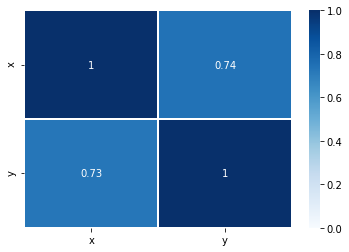

In [0]:
import librosa
path1='/content/drive/My Drive/COVID-19 Converted-333/COVID-19 Converted/Postive-con/pos-7.wav'
path2 ='/content/drive/My Drive/COVID-19 Converted-333/COVID-19 Converted/Negative-con/neg-1.wav'
dr =10
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.feature.mfcc(x,sr,n_mfcc=25)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.feature.mfcc(x1,sr1,n_mfcc=25)
mat = [values1,values2]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
#print(mat)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(sc.score(mat1,"x","y"))

import seaborn as sns
df_matrix = sc.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)


Correlation between Constant Q Chromogram

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0, 'metric': 'mean absolute error', 'baseline_score': 0.21722013359057776, 'model_score': 0.22190913712459542, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


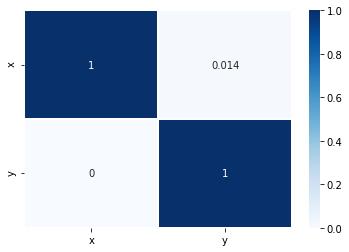

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.feature.chroma_cqt(x,sr)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.feature.chroma_cqt(x1,sr1)
mat = [values1[1],values2[1]]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
#print(mat)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])
'''
corr = mat1.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)
'''

print(pps.score(mat1,"x","y"))

import seaborn as sns
df_matrix = pps.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Correlation between Melspectrograms

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0, 'metric': 'mean absolute error', 'baseline_score': 0.005875087965101716, 'model_score': 0.008317048916141044, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


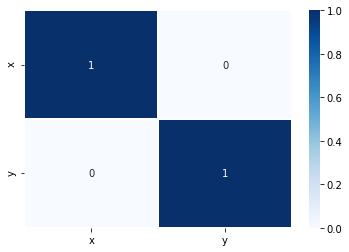

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.feature.melspectrogram(x,sr)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.feature.melspectrogram(x1,sr1)
mat = [values1[1],values2[1]]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(pps.score(mat1,"x","y"))

import seaborn as sns
df_matrix = pps.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Correlation between Pitches

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0, 'metric': 'mean absolute error', 'baseline_score': 0.12622401196788996, 'model_score': 0.205598646294191, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


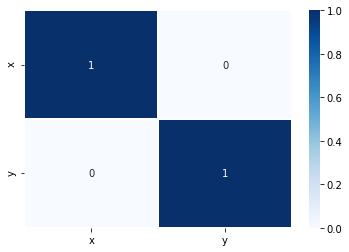

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.piptrack(x,sr)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.piptrack(x1,sr1)
mat = [values1[1],values2[1]]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(sc.score(mat1,"x","y"))

import seaborn as sns
df_matrix = sc.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Correlation between ZCR

{'x': 'x', 'y': 'y', 'task': 'predict_constant', 'ppscore': 1, 'metric': None, 'baseline_score': 1, 'model_score': 1, 'model': None}


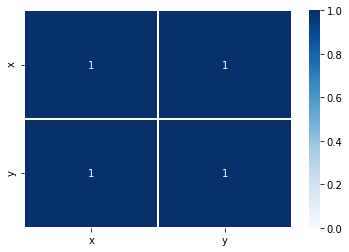

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.core.zero_crossings(x)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.core.zero_crossings(x1)
mat = [values1[1],values2[1]]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(sc.score(mat1,"x","y"))

import seaborn as sns
df_matrix = sc.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Correlations between Spectral Roll_off

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0.4540056713689332, 'metric': 'mean absolute error', 'baseline_score': 1051.4048565291473, 'model_score': 574.0610887600749, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


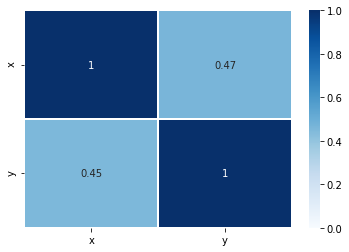

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.feature.spectral_rolloff(y=x,sr=sr)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.feature.spectral_rolloff(y=x1,sr=sr)
mat = [values1,values2]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(sc.score(mat1,"x","y"))

import seaborn as sns
df_matrix = sc.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

Correlations between Spectral Centroid

{'x': 'x', 'y': 'y', 'task': 'regression', 'ppscore': 0.4379946629550828, 'metric': 'mean absolute error', 'baseline_score': 441.02828408269283, 'model_score': 247.86024944223524, 'model': DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')}


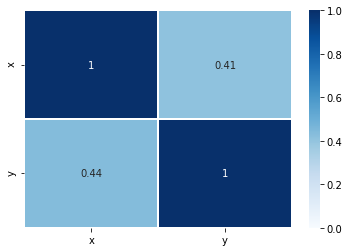

In [0]:
x,sr = librosa.load(path1,duration=dr)
values1 =librosa.feature.spectral_centroid(x,sr)
x1,sr1 = librosa.load(path1,duration=dr)
values2 =librosa.feature.spectral_centroid(x1,sr)
mat = [values1,values2]
mat=np.array(mat)
mat = np.reshape(mat,(2,-1))
mat= mat.reshape(mat.shape[1],2)
mat1 = pd.DataFrame(data=mat,columns=['x','y'])


print(sc.score(mat1,"x","y"))

import seaborn as sns
df_matrix = sc.matrix(mat1)
sns.heatmap(df_matrix, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

**Data Splitting**

In [0]:
from sklearn.model_selection import train_test_split
(x_train, xtest, ytrain, ytest) = train_test_split(feature, labels,
	test_size=0.20, stratify=labels, random_state=40)

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lb = LabelBinarizer()
labels = lb.fit_transform(data.label)
lb.get_params(deep=True)


{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

**Model checking**

In [0]:
from sklearn.model_selection import train_test_split
(x_train, xtest, ytrain, ytest) = train_test_split(feature, labels,
	test_size=0.20, stratify=labels, random_state=40)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rc = RandomForestClassifier(n_estimators = 300,max_depth=50,random_state=50)
rc .fit(x_train,ytrain)
accuracy = rc.score(xtest,ytest)
print(accuracy*100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


85.71428571428571


In [0]:
pred = rc.predict(xtest)
print(sklearn.metrics.confusion_matrix(ytest, pred))
print(classification_report(ytest, pred)) 

[[3 1]
 [0 3]]
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



In [0]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF,  verbose = 3, 
                      )
bestF = gridF.fit(x_train, y_train)

#Second Trial On Real Data

> This is Second trial of training on real data  

> I have 63 samples

**Data Extracting**

In [0]:

import glob
import os
import pandas as pd


df_new = []
for folder in ['/content/drive/My Drive/Clean/Postive-con/**',
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      if label  in ["wav"]:
      
        df_new.append(
              {
                  "filename " : fname,
               "result" : "positve" ,
               
              })

In [0]:

import glob
import os
import pandas as pd


for folder in ["/content/drive/My Drive/Colab Notebooks/Audio Data/COVID-19 Converted/COVID-19 Converted/Negative-con/**",
             
               ]:
  for fname in glob.iglob(folder):
    if os.path.exists(fname):
      label = os.path.basename(fname).split(".")[1]
      
      if label  in ["wav"]:
      
        df_new.append(
              {
                  "filename " : fname,
               "result" : "negative" ,
               
              })

In [0]:
import pandas as pd
data_new = pd.DataFrame(df_new)
data_new.head()

,filename,result
0,/content/drive/My Drive/Clean/Postive-con/pos-...,positve
1,/content/drive/My Drive/Clean/Postive-con/pos-...,positve
2,/content/drive/My Drive/Clean/Postive-con/pos-...,positve
3,/content/drive/My Drive/Clean/Postive-con/pos-...,positve
4,/content/drive/My Drive/Clean/Postive-con/pos-...,positve


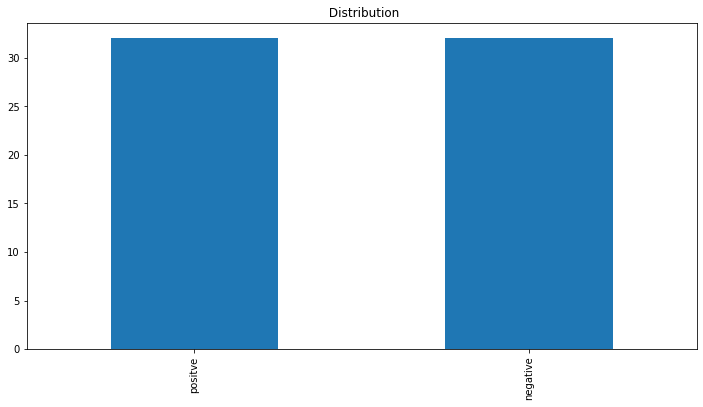

positve     32
negative    32
Name: result, dtype: int64


In [0]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,6))
data_new['result'].value_counts().plot(kind = 'bar' , title = ' Distribution' )
plt.show()
print(data_new['result'].value_counts())

**Features Extraction**

I  have Extract different Features down below
* rms
* zcr 
* spectral_energy 
* centroid
* mfcc
* rolloff
*pitch
*melspectrogram
*Constant-Q chromagram


In [0]:
from tqdm import tqdm
rms_energy = []
zcr = []
spectral_energy = []
centroid=[]
mfcc=[]
rolloff=[]
pitch=[]
mel=[]
chroma1 = []

dr =10 

def features1(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_centroid(x,sr)
  return values

def features2(path):
  x,sr = librosa.load(path,duration=dr)
  values = librosa.core.zero_crossings(x)
  return values

def features3(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.spectral_rolloff(y=x,sr=sr)
  return values

def features4(path):
  x,sr = librosa.load(path,duration=dr)
  values, magnitudes = librosa.piptrack(y=x, sr=sr)
  return values

def features5(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.mfcc(x,sr,n_mfcc=25)
  return values


def features6(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.rms(y=x)

def features7(path):
  x,sr = librosa.load(path,duration=dr)
  values =librosa.feature.melspectrogram(y=x,sr=sr)
  return values


def features8(path):
  x,sr = librosa.load(path)
  values =librosa.get_duration(y=x,sr=sr)
  return values
def melfeatures(path):
  f,samp_rate = librosa.load(path=path,duration = dr)
  mel = librosa.feature.melspectrogram(y=f ,sr = samp_rate)
  return mel
def chroma(path):
  f,samp_rate = librosa.load(path=path,duration = 10)
  mfccs = librosa.feature.chroma_cqt(y=f,sr=samp_rate)
  return mfccs 




In [0]:
import librosa
trai = data_new.rename(columns={'filename ': 'filename'})
for i in tqdm(range(len(trai))):
  rms_energy.append(features6(trai.filename.iloc[i]))
  zcr.append(features2(trai.filename.iloc[i])) 
  mfcc.append(features5(trai.filename.iloc[i])) 
  centroid.append(features1(trai.filename.iloc[i])) 
  spectral_energy.append(features5(trai.filename.iloc[i]))
  rolloff.append(features3(trai.filename.iloc[i])) 
  pitch.append(features4(trai.filename.iloc[i]))
  mel.append(melfeatures(trai.filename.iloc[i]))
  chroma1.append(chroma(trai.filename.iloc[i]))
  

100%|██████████| 64/64 [06:30<00:00,  6.10s/it]


In [0]:
import numpy as np

rms_energy = np.array(rms_energy)
zcr = np.array(zcr)
spectral_energy= np.array(spectral_energy)
centroid = np.array(centroid)
mfcc= np.array(mfcc)
rolloff=np.array(rolloff)
pitch= np.array(pitch)
mel=np.array(mel)
chroma1 = np.array(chroma1)

In [0]:
print(rms_energy.shape)
print(zcr.shape)
print(spectral_energy.shape)
print(centroid.shape)
print(mfcc.shape)
print(rolloff.shape)
print(pitch.shape)
print(mel.shape)
print(chroma1.shape)

(64,)
(64, 220500)
(64, 25, 431)
(64, 1, 431)
(64, 25, 431)
(64, 1, 431)
(64, 1025, 431)
(64, 128, 431)
(64, 12, 431)


In [0]:
feature1_new = np.concatenate((mel,pitch,mfcc,centroid,chroma1,rolloff),axis=1)
#feature1 = np.concatenate((mel,pitch,mfcc,chroma1),axis=1)
feature2_new= feature1_new.reshape(feature1_new.shape[0],feature1_new.shape[1]*feature1_new.shape[2])
feature_new = np.concatenate((feature2_new,zcr),axis =1 )
feature_new.shape

(64, 734252)

**Data Splitting**

In [0]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
lb = LabelBinarizer()
results = lb.fit_transform(data_new.result)
lb.get_params(deep=True)


Using TensorFlow backend.


{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}

In [0]:
from sklearn.model_selection import train_test_split
(x_train_new, xtest_new, ytrain_new, ytest_new) = train_test_split(feature_new,results,
	test_size=0.30, stratify=results, random_state=40)

**First Model Testing**

In [0]:
from sklearn.svm import SVC
sc_new= SVC(kernel='sigmoid')
sc_new.fit(x_train_new,ytrain_new)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
sc_new.score(xtest_new, ytest_new)

0.7894736842105263

In [0]:
pred_new = sc_new.predict(xtest_new)
print(sklearn.metrics.confusion_matrix(ytest_new, pred_new))
print(classification_report(ytest_new, pred_new))

[[7 3]
 [1 8]]
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.73      0.89      0.80         9

    accuracy                           0.79        19
   macro avg       0.80      0.79      0.79        19
weighted avg       0.81      0.79      0.79        19



**Second Model Testing(Coding phase)**

In [0]:
from sklearn.model_selection import train_test_split
(x_train_new, xtest_new, ytrain_new, ytest_new) = train_test_split(feature_new,results,
	test_size=0.30, stratify=results, random_state=20)

In [0]:
sc_new.score(xtest_new, ytest_new)

0.85

In [0]:
import sklearn
pred_new = sc_new.predict(xtest_new)
print(sklearn.metrics.confusion_matrix(ytest_new, pred_new))
print(classification_report(ytest_new, pred_new))

[[10  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



**Parameters Searching**
> Still Doing

In [0]:
from sklearn.model_selection import GridSearchCV 

param_grid = {'C': [0.1, 1, 10, 100, 1000],  
               
              'kernel':  ['sigmoid']}  
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,cv = 3) 

In [0]:
grid.fit(x_train_new, ytrain_new)

In [0]:
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [0]:
import sklearn
pred_new = sc_new.predict(xtest_new)
print(sklearn.metrics.confusion_matrix(ytest_new, pred_new))
print(classification_report(ytest_new, pred_new))

[[10  0]
 [ 3  7]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.70      0.82        10

    accuracy                           0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20



In [0]:
sklearn.metrics.matthews_corrcoef(ytest_new, pred_new)

0.7337993857053428

In [0]:
sklearn.metrics.roc_auc_score(ytest_new, pred_new)

0.85

> TO DO:

* Apply Cross Validation like Kfold

* Working on more features and data

* Filters part